# Esperimento Foucault - parte 2

## Importo Le Librerie

In [1]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files

## Fit Gaussiana

### Carico I Dati

In [150]:
# carica tutti i dati raccolti dall'esperimento in ordine crescente

dati_totali = {}

for i in range(14):
  dati_totali["dati-" + str(i + 1)] = []

print(dati_totali)

for i in range(len(dati_totali)):
  filename = list(files.upload().keys())[0] #chiede di caricare il file e ne estrae il nome
  dati_totali["dati-" + str(i + 1)] = np.loadtxt(filename, dtype=np.float, delimiter="\t", skiprows=2)


In [ ]:
# Esegui questa cella per fare una breve analisi dei dati necessaria ai fit successivi, metti PLOT=False per non plottare i grafici

PLOT = True

parameters = []
peaks = []

for i in range(len(dati_totali)):
  current_data = dati_totali["dati-" + str(i + 1)]
  if len(current_data) < 1:
    continue

  x = np.array(current_data[:,0])
  y = np.array(current_data[:,1])

  y_max = 0
  ct = 0
  for i in y:
    if i > y_max:
      y_max = i

    ct += 1
  peaks.append(y_max)

  for k in range(len(x)):
    if y[k] == y_max:
      parameters.append(x[k])
      break

  if PLOT:
    plt.scatter(x, y)

### Eseguo Il Fit

In [57]:
def funzione_fit(p, x):
  # base = 1/(p[0] * np.sqrt(2 * np.pi))
  expo = - (( (x - p[1]) ** 2 ) / (2 * (p[0] ** 2)))
  y = p[3] * np.exp(expo) + p[2]
  return y 

In [73]:
def fitplot(sigma, mu, y0, h, output=True, show_guess=True):
  modello = odr.Model(funzione_fit)
  fit_data = odr.RealData(x, y)
  beta0 = np.array([sigma, mu, y0, h]) #array of initial guesses
  fit = odr.ODR(fit_data, modello, beta0=beta0)
  out = fit.run()
  
  sample_x = np.linspace(0,np.amax(x),1600)
  plt.show()
  plt.figure(figsize=(9, 6))
  plt.scatter(x, y, label="exp")
  if show_guess:
    plt.plot(sample_x, funzione_fit(beta0, sample_x), color=[0, 1, 0], linewidth=3, label="guess")
  plt.plot(sample_x, funzione_fit(out.beta, sample_x), color=[1,0,0], linewidth=3, label="fit")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  if output:
    labels = ["2*sigma", "mu", "y0", "h"]
    for i in range(len(labels)):
      print("%10s = %9.3f" % (labels[i], out.beta[i]))


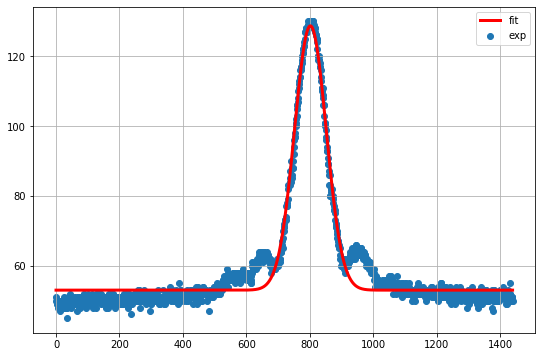

    2sigma =    49.968
        mu =   801.668
        y0 =    52.977
         h =    75.771


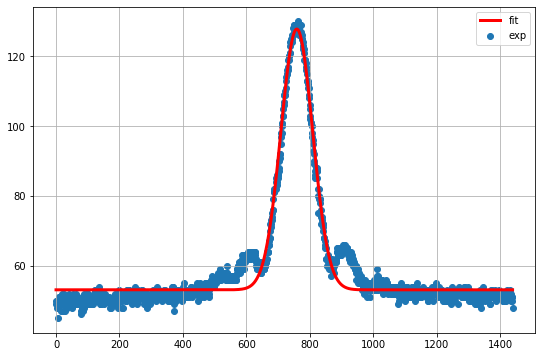

    2sigma =    50.166
        mu =   758.870
        y0 =    53.072
         h =    74.751


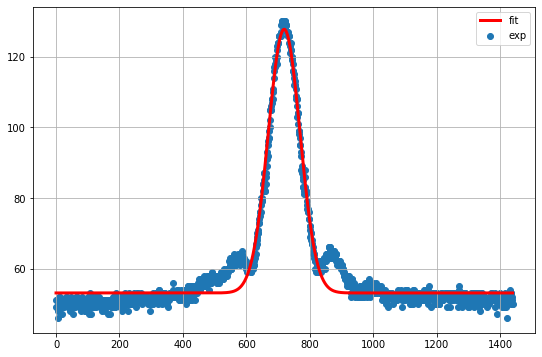

    2sigma =    50.073
        mu =   719.084
        y0 =    53.090
         h =    74.688


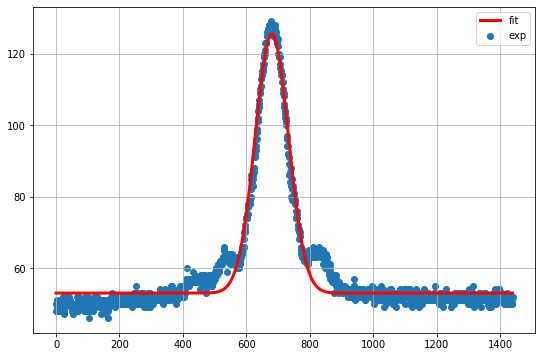

    2sigma =    52.263
        mu =   680.105
        y0 =    52.959
         h =    72.538


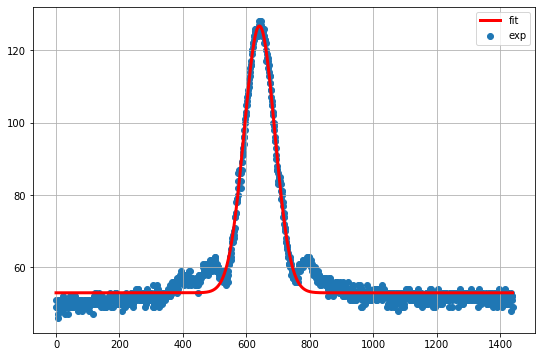

    2sigma =    48.131
        mu =   641.100
        y0 =    52.962
         h =    73.800


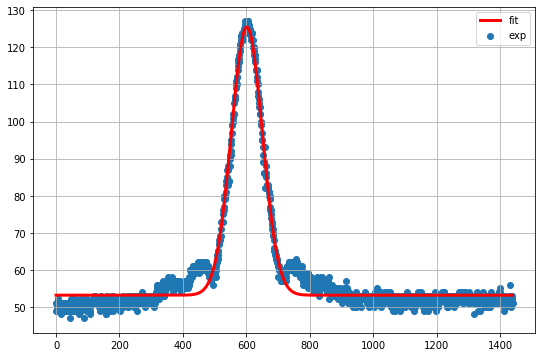

    2sigma =    48.835
        mu =   601.402
        y0 =    53.151
         h =    72.364


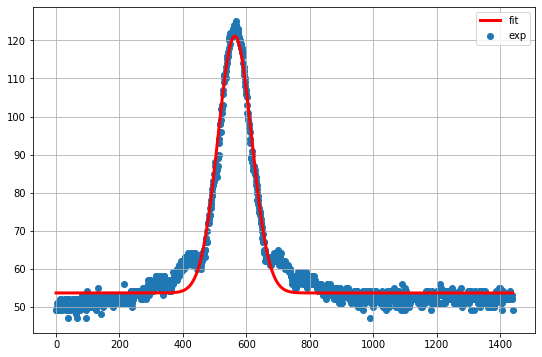

    2sigma =    53.027
        mu =   563.335
        y0 =    53.582
         h =    67.570


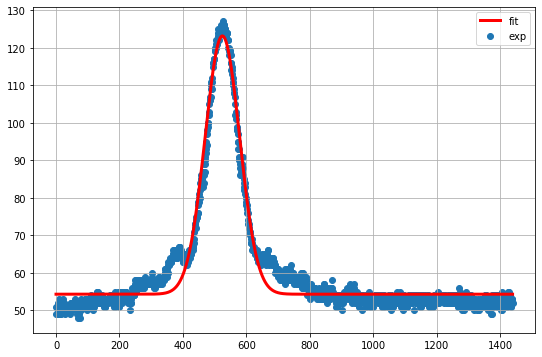

    2sigma =    54.632
        mu =   524.273
        y0 =    54.335
         h =    68.816


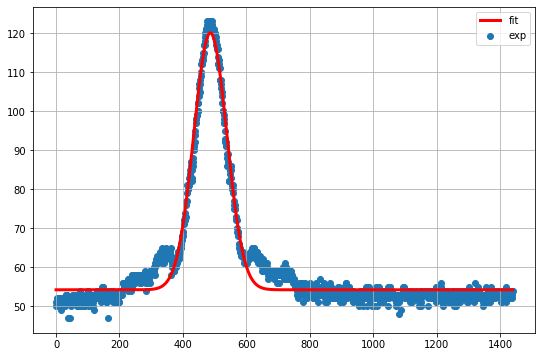

    2sigma =    51.953
        mu =   486.248
        y0 =    54.224
         h =    65.859


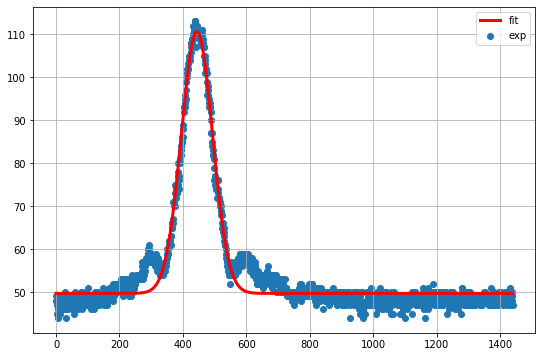

    2sigma =    49.145
        mu =   444.130
        y0 =    49.732
         h =    60.910


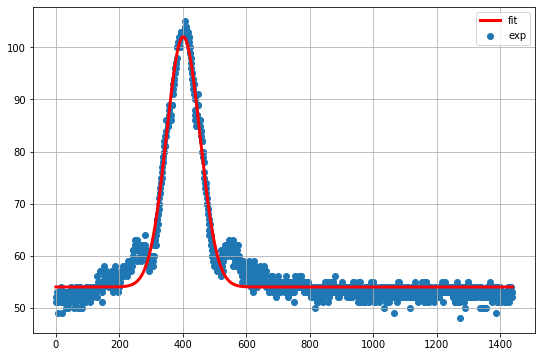

    2sigma =    52.885
        mu =   401.280
        y0 =    53.956
         h =    48.092


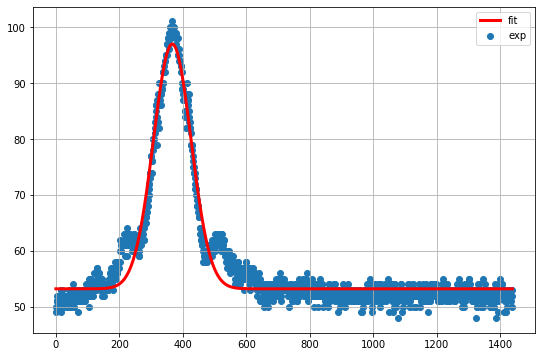

    2sigma =    59.527
        mu =   366.726
        y0 =    53.210
         h =    43.761


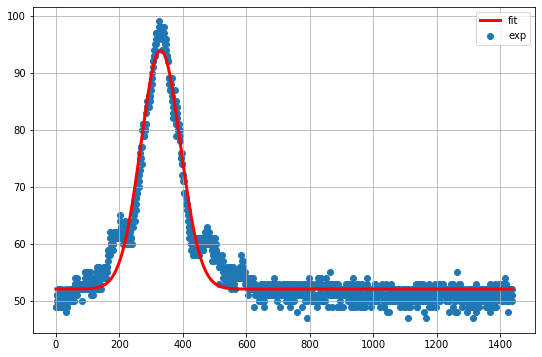

    2sigma =    62.409
        mu =   330.132
        y0 =    52.073
         h =    41.836


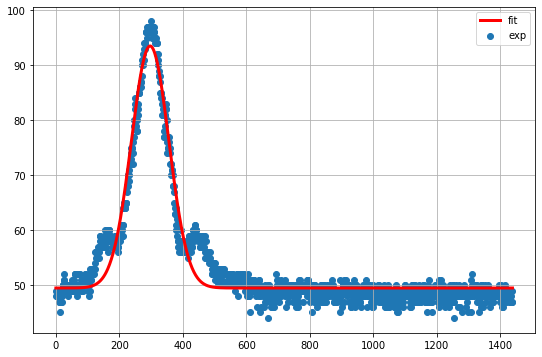

    2sigma =    59.258
        mu =   296.980
        y0 =    49.455
         h =    44.081


In [107]:
# fit approssimativo di tutti i dati; approssimativo perché la mole di dati alla base della gaussiana sono fonte di disturbo per il fit che è quindi meno preciso
# per risolvere il problema è possibile usare un algoritmo di selezione sui dati prima di fare il fit o un algoritmo per ricavare la dispersione sigma dai dati già estrapolati

for i in range(len(dati_totali)):
  current_data = dati_totali["dati-" + str(i + 1)]
  if len(current_data) < 1:
    continue
    
  x = np.array(current_data[:,0])
  y = np.array(current_data[:,1])

  fitplot(1, parameters[i], 60, peaks[i], show_guess=False)

## Fit Lineare

### Carico I Dati

In [151]:
# le ampiezze(delta L) le ho prese dal foglio excel di Arianna, è possibile ricavarle anche dai dati caricati prima ma non ho fatto in tempo a preparare l'algoritmo

ampiezze = [0.000147878, 0.000285287, 0.000420236, 0.000554082, 0.000690792, 0.000822181, 0.000956694, 0.001088470, 0.001233340, 0.001380516, 0.001499542, 0.001626479, 0.001740161] # m
frequenze_per_quattro = [663.564, 769.075, 867.149, 963.785, 1060.98, 1161.66, 1258.70, 1355.78, 1450.80, 1552.61, 1656.00, 1741.21, 1826.70, 1910.70] # 4 hz
frequenze = [i / 4 for i in frequenze_per_quattro] # hz

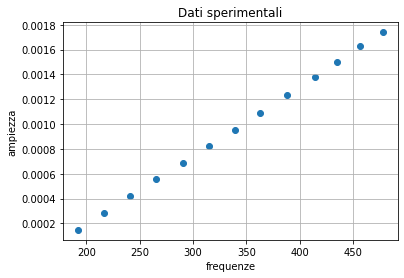

In [117]:
distanza_1 = 8.13 # m 
distanza_2 = 8.15 # m

x = np.array(frequenze[1:])
y = np.array(ampiezze)


plt.figure()
plt.title("Dati sperimentali")
plt.xlabel("frequenze")
plt.ylabel("ampiezza")
plt.grid()
_=plt.scatter(x,y)

### Eseguo Il Fit

In [145]:
def retta(p, x):
  return p[0] * x + p[1]

def rect(x, A, B):
  return A * x + B

In [146]:
def fitplot(A, B, show_guess=True, output=True):
  modello = odr.Model(retta)
  fit_data = odr.RealData(x, y)
  beta0 = np.array([A, B]) #array of initial guesses
  fit = odr.ODR(fit_data, modello, beta0=beta0)
  out = fit.run()
  
  sample_x = np.linspace(x[0],np.amax(x),1600)
  plt.show()
  plt.figure(figsize=(9, 6))
  plt.scatter(x, y, label="exp")
  if show_guess:
    plt.plot(sample_x, retta(beta0, sample_x), color=[0, 1, 0], linewidth=3, label="guess")
  plt.plot(sample_x, retta(out.beta, sample_x), color=[1,0,0], linewidth=3, label="fit")
  plt.grid(which='both')
  plt.legend()
  plt.show()

  if output:
    labels = ["c"]
    for i in range(len(labels)):
      print("%10s = %9.6f" % (labels[i], (8 * np.pi * distanza_1 * distanza_2 / out.beta[i]) ))

def aplot():
  popt, pcov = curve_fit(rect, x, y)

  plt.figure()
  plt.scatter(x, y)
  plt.plot(x, rect(x, popt[0], popt[1]), color="red")
  plt.show()

  label = ["c", "y0"]
  for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))):
    print("%10s = %9.6f +/- %7.10f" % (l, (8 * np.pi * distanza_1 * distanza_2 / v), e ))
    break

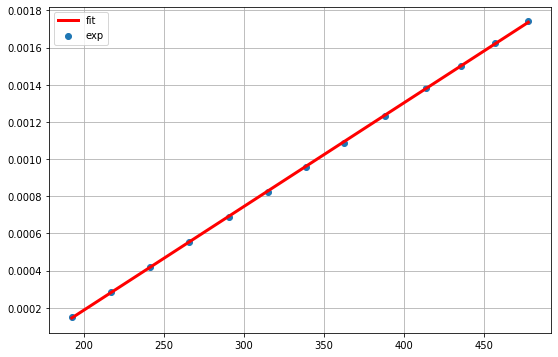

         c = 298809792.263824


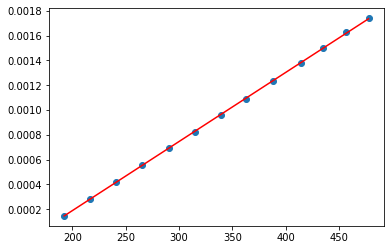

         c = 298809790.728732 +/- 0.0000000143


In [147]:
fitplot(0, 0, show_guess=False)
aplot()